In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from datetime import datetime
import csv

In [2]:
def make_comptage_df(comptage_filename):

    with open(comptage_filename, 'r') as datafile:
        json_comptage_data = json.load(datafile)
        
    comptage_df = pd.DataFrame(json_comptage_data, columns = ['date', 'comptage'])
    comptage_df['date'] = pd.to_datetime(comptage_df['date'])
    comptage_df.index = comptage_df['date']
    del comptage_df['date']

    return(comptage_df)

In [3]:
def make_weather_df(weather_filename):

    with open(weather_filename, 'r') as datafile:
        weather_df = pd.read_csv(datafile, sep = ',', usecols=['date', 'avg_temperature'])

    weather_df['date'] = pd.to_datetime(weather_df['date'])
    
    weather_df.index = weather_df['date']
    del weather_df['date']
    #weather_df.sort_values(by = ['avg_temperature'])

    
        
    return(weather_df)

In [4]:
weather_filename = 'src/weatherstats_montreal_daily.csv'
weather_df = make_weather_df(weather_filename)
weather_df.head()

,avg_temperature
date,
2018-12-01,-0.09
2018-11-30,0.20
2018-11-29,1.70
2018-11-28,1.35
2018-11-27,0.45


In [5]:
comptage_filename = 'src/100025474.json'
comptage_df = make_comptage_df(comptage_filename)
comptage_df.head()

,comptage
date,
2016-12-01,1562
2016-12-02,1898
2016-12-03,1219
2016-12-04,1224
2016-12-05,776


In [6]:
merge_df = pd.merge(weather_df, comptage_df[['comptage']], on='date')
merge_df.head()

,avg_temperature,comptage
date,,
2018-12-01,-0.09,726
2018-11-30,0.20,1179
2018-11-29,1.70,5746
2018-11-28,1.35,3954
2018-11-27,0.45,2989


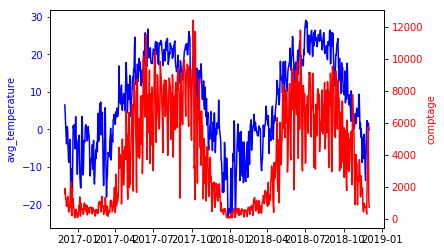

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(merge_df['avg_temperature'], 'blue')
ax1.set_ylabel('avg_temperature', color = 'blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    
ax2 = ax1.twinx()
ax2.plot(merge_df['comptage'], 'red')
ax2.set_ylabel('comptage', color = 'red')
for tl in ax2.get_yticklabels():
    tl.set_color('red')

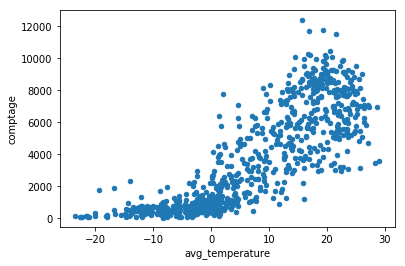

In [8]:
merge_df.plot.scatter(x = 'avg_temperature', y = 'comptage')

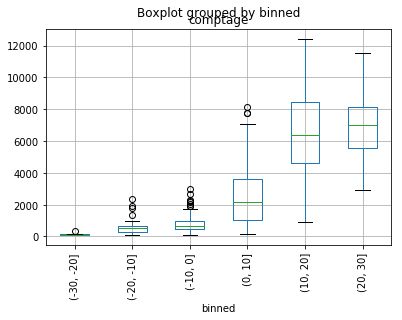

In [9]:
merge_df['binned'] = pd.cut(merge_df['avg_temperature'], bins = [-30, -20, -10, 0, 10, 20, 30])
merge_df.boxplot(by = 'binned', column = 'comptage', rot = 90)